# Classification Trees

Per prima cosa conviene importare un po' di pacchetti. Proviamo a usare sklearn.

In [1]:
from tqdm import tqdm

import numpy as np
np.random.seed(0)  # keep the random seed of numpy fixed

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Configure matplotlib
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Dobbiamo anche scegliere un dataset su cui lavorare. Forse ha senso usare come base l'Iris Dataset.

In [2]:
iris = datasets.load_iris()
print(iris.DESCR)
X, y = iris.data, iris.target

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

La documentazione la si trova su questo sito: [Documentazione](https://scikit-learn.org/stable/modules/tree.html). \
Proviamo a usare un po' di funzioni come [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) o anche [`plot_tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree).

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

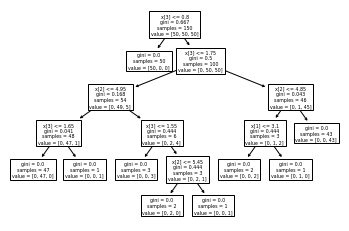

In [3]:
tree_maker = DecisionTreeClassifier()
# Ci sono diversi parametri da settare nel caso si voglia

tree_maker.fit(X, y)
plot_tree(tree_maker)

Non so magari qua si potrebbero analizzare alcuni dati come accuratezza e roba varia (magari decidi in seguito). Prova a leggere meglio anche la documentazione per vedere se trovi spunti interessanti da analizzare (magari chiedi anche a Bianchi perchè sembra roba che ho fatto anche in classe).

Potrei provare a implementarlo da solo il codice: vediamo cosa ne esce fuori. Il vero problema sarebbe capire come implementare bene un albero (cerca magari online se è possibile avere già una classe tree o qualcosa del genere). Inoltre c'è da capire come scegliere il cutpoint (quello che sulle note è indicato come *s*) perchè in teoria può assumere un numero esorbitante di valori.

Ma cosa succede se mi limito a considerare due feature?

[Text(0.36890243902439024, 0.9615384615384616, 'x[0] <= 5.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.0975609756097561, 0.8846153846153846, 'x[1] <= 2.8\ngini = 0.237\nsamples = 52\nvalue = [45, 6, 1]'),
 Text(0.04878048780487805, 0.8076923076923077, 'x[0] <= 4.7\ngini = 0.449\nsamples = 7\nvalue = [1, 5, 1]'),
 Text(0.024390243902439025, 0.7307692307692307, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.07317073170731707, 0.7307692307692307, 'x[0] <= 4.95\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.04878048780487805, 0.6538461538461539, 'x[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.024390243902439025, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.07317073170731707, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.0975609756097561, 0.6538461538461539, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.14634146341463414, 0.8076923076923077, 'x[0] <= 5.35\ngini = 0.

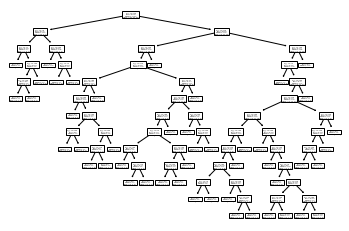

In [4]:
tree_maker = DecisionTreeClassifier()
# Ci sono diversi parametri da settare nel caso si voglia

X2 = X[:, (0,1)]
tree_maker.fit(X2, y)
plot_tree(tree_maker)

Sono curioso di vedere cosa succede se uso il dataset con i due cerchi concentrici che ho usato nella logistic regression. Proviamo.

0.9233333333333333


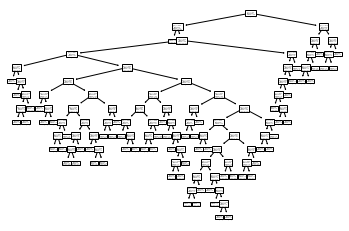

In [5]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score

X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7)

tree_maker = DecisionTreeClassifier()
# Ci sono diversi parametri da settare nel caso si voglia

tree_maker.fit(X_train, y_train)
plot_tree(tree_maker)
y_pred = tree_maker.predict(X_test)
print(accuracy_score(y_test, y_pred))

# Non è male come accuratezza però si può fare di meglio

## Random Forests
Proviamo ora a vedere come implementare le Random Forests e il Bagging. Faccio riferimento alla seguente [Documentazione](https://scikit-learn.org/stable/modules/ensemble.html). \
Per quanto riguarda le random forests si può usare il metodo [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier). Questo è goà implementato da loro: potrebbe essere interessante provare a implementarlo da solo.

In [6]:
random_for = RandomForestClassifier(n_estimators = 100)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.7)
rf_data = random_for.fit(X_train, y_train)
y1 = rf_data.predict(X_val)
#acc = (y1[:] == y_val[:])
acc = accuracy_score(y_val, y1)
print(acc)

0.9566666666666667
